Analysis

- It can be inferred that Capomulin and Ramicane treatments were more effective than the other drugs based on the statistic table and box plot.
- The study of Capomulin drug on mouse l509 showed the total tumor volume declines over the span of the study indicating a positive outcome.
- The correlation between average tumor volume and mouse weight is 0.84, which indicates when the mouse weight increases the average tumor volume also increases.

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress
import numpy as np

mouse_metadata_path = "/Users/meganconnelly/Desktop/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/meganconnelly/Desktop/Pymaceuticals/data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Number of mice
num_mice = combined_data_df["Mouse ID"].nunique()
print(num_mice)

249


In [5]:
#  Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [8]:
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print(duplicate_mice_ids)
print(duplicate_mice_ids.dtype)

['g989']
object


In [26]:
clean_data_df = combined_data_df.loc[combined_data_df["Mouse ID"] != 'g989']


In [27]:
# Number of mice in the clean DataFrame
mice_count = clean_data_df["Mouse ID"].nunique()
print(mice_count)

248


In [29]:
## Summary Statistics
summary_stats_df = clean_data_df.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for each drug
tumor_mean = summary_stats_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_stats_df['Tumor Volume (mm3)'].median()
tumor_variance = summary_stats_df['Tumor Volume (mm3)'].var()
tumor_stdev = summary_stats_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_stats_df['Tumor Volume (mm3)'].sem()

summary_complete_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance, "Standard Deviation": tumor_stdev, "SEM": tumor_sem})
summary_complete_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [30]:
sum_stats_table = summary_stats_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
print(sum_stats_table)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [36]:
## Bar and Pie Charts

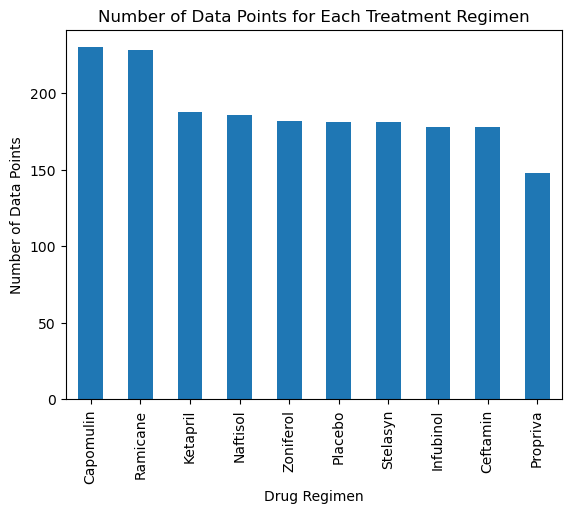

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_data_df['Drug Regimen'].value_counts().plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment Regimen")
plt.show()

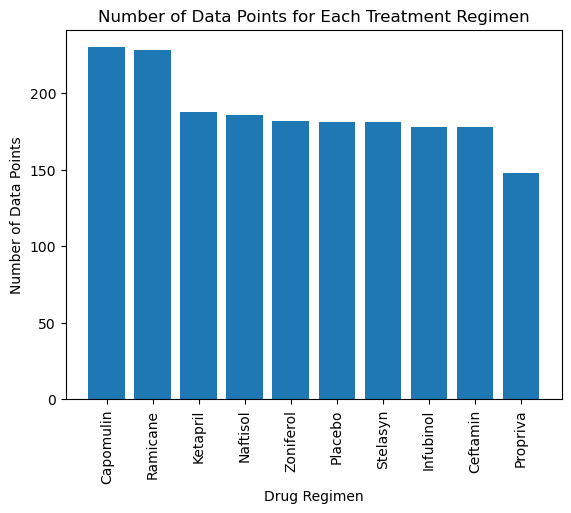

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment Regimen")
plt.show()

In [47]:
## Pie Plots

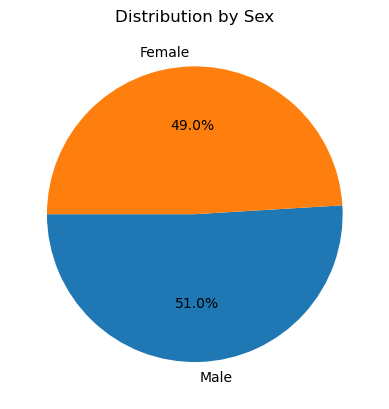

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_data_df['Sex'].value_counts()
pie_plot = pie_data.plot.pie(autopct="%1.1f%%", startangle=180, title='Distribution by Sex')
plt.ylabel('')
plt.show()

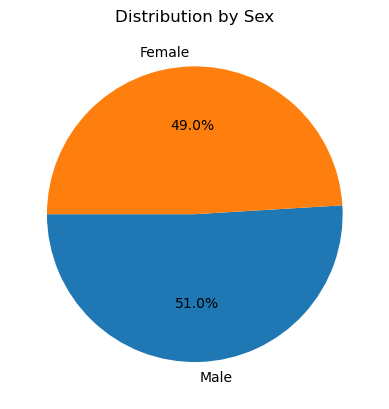

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = clean_data_df['Sex'].value_counts()
plt.pie(pie_data, labels=pie_data.index.values, autopct="%1.1f%%", startangle=180)
plt.title('Distribution by Sex')
plt.show()

In [53]:
## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = clean_data_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data_df, max_tp_df, on=['Mouse ID','Timepoint'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

for drug in drugs:
    temperature_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    
    final_volume_df = temperature_df.loc[temperature_df['Timepoint'] == temperature_df['Timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q-lower_q
    print(f'IQR for {drug}: {iqr}')
    
     # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers = values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)].count()
    print(f'Number of {drug} outliers: {outliers}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


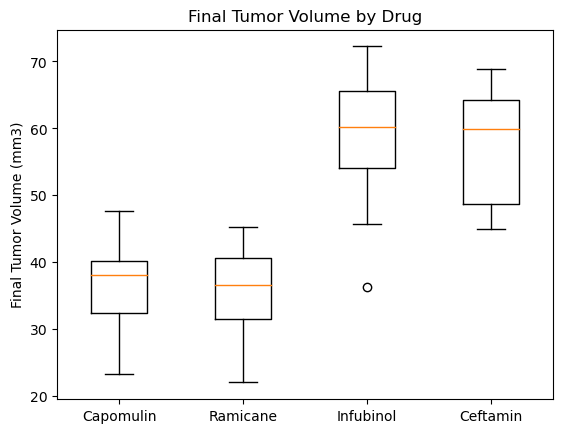

In [77]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(drug_values)

plt.title('Final Tumor Volume by Drug')
plt.ylabel( 'Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

In [78]:
## Line and Scatter Plots

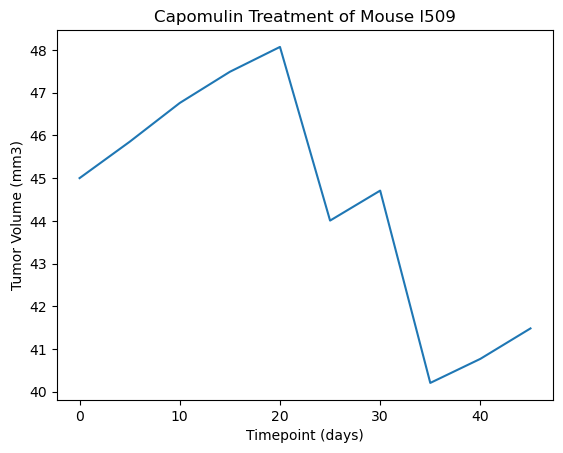

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_data_df.loc[clean_data_df['Mouse ID'] == 'l509']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

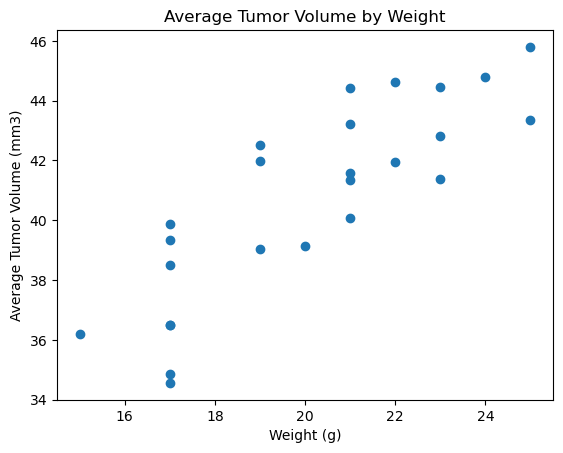

In [84]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
average_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

average_vol_df = pd.merge(capomulin_df, average_vol_df, on= 'Mouse ID')
final_average_vol_df = average_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_average_vol_df.head()

x = final_average_vol_df['Weight (g)']
y = final_average_vol_df['avg_tumor_vol']

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

In [85]:
## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

The correlation between mouse weight and the average tumor volume is 0.84.


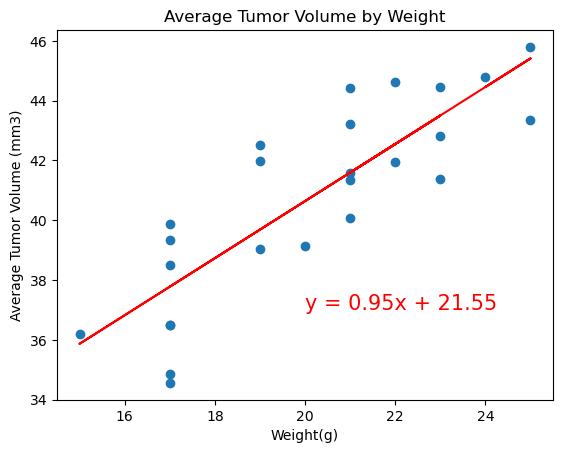

In [106]:
# Calulate linear regression
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_equation = "y = {}x + {}".format(round(slope,2), round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (20,37),fontsize=15,color="red")

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

